<a href="https://colab.research.google.com/github/TADY25/Assigment-0/blob/main/Assignment1__1241037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Data Mining and Machine Learning - Assignment 1

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression 1 and 2 (up to and including week 5)

**Due: Sunday November 7, 23.59pm**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the sales of a store.

Run the first few cells to load the dataset and then get started with the questions! 

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit [your Python notebook](https://moodle.unil.ch/mod/assign/view.php?id=841447)
2. Answer the questions to [the quiz on Moodle](https://moodle.unil.ch/mod/quiz/view.php?id=1172387) 
>Note: You can only complete the quiz one time. Have your notebook with the asnwers ready for answering the quiz. 

The answers to the quiz should be supported by your code in the notebook. If they are not, you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in slack [channel #assignments](https://app.slack.com/client/T02C4KVGVMX/C02BBA2TFQF).


If there is need for further clarifications on the questions, after the assignment is released, we will update the file on GitHub, so make sure you check the git repo of the class for updates.

Good luck!

In [9]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [521]:
# Load the data
df=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/sales.csv')

For the first part we use data on the retail sales of a store over several years. The dataset includes information on items purchased from this store, including for each item or article:
* order ID (a unique identifyier of the order through which this item was purchased)
* date of the order
* date the shipment was made
* mode of shipment used (first class, second class, etc.)
* customer ID (unique identifyier of the client)
* customer name
* client segment (consumer, corporate, etc.)
* country, city, state, postal code, region of the client
* product ID, product category, sub-category, and product name
* sales value for purchased items in USD.

## 1. Understand and Clean the Dataset

>1.1 Show the first 5 or 10 rows to get an idea of the data. 

In [522]:
# YOUR CODE HERE
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000



### 1.2 Describe the dataset.

>1.2.1. How many observations(rows) and columns are in the dataset?

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [524]:
# YOUR CODE HERE
df.shape

(9800, 18)

**Cardinality (number of rows/observations) = 9800**

There are 9800 observations.

**Dimensionality (number of columns) = 18**

There are 18 attributes of the items purchased.

> 1.2.2. For which variable(s), if any, are there missing/null values?

In [525]:
# YOUR CODE HERE
df.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
dtype: int64

There are 11 missing/null values for Postal Code.

>1.2.3. Which state generated the highest demand by *number* of items ordered over the entire period?

In [526]:
# YOUR CODE HERE
df["State"].value_counts().head(5)


California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: State, dtype: int64

California.

>... and which state generated the highest demand by total (aggregated) sales over the entire period?

In [527]:
# YOUR CODE HERE
df.groupby("State", as_index=False)["Sales"].agg({"StateSales": "sum"}).sort_values("StateSales", ascending=False).reset_index().head(5)


,index,State,StateSales
0,3,California,446306.4635
1,30,New York,306361.1470
2,41,Texas,168572.5322
3,45,Washington,135206.8500
4,36,Pennsylvania,116276.6500


California.

>1.2.4. What percentage of technology items (Hint: look at Category) were shipped first class (Hint: look at Ship Mode)?

In [533]:
# YOUR CODE HERE
df['Category' == 'Technology'].count()

KeyError: ignored

### 1.3. Data types and handling missing values

>1.3.1. List the different features and their data type. ¶


In [534]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

>1.3.2. Are there any duplicated entries?

In [535]:
# YOUR CODE HERE
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [536]:
df.loc[df.duplicated()=='True', :]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales


No, there are no duplicated entries.

>1.3.3. Change the data type for the following columns: Order Date, Ship Date (from string to datetime), Ship Mode and Segment, from string to category. 

In [537]:
# YOUR CODE HERE
df.Order_Date = pd.to_datetime(df.Order_Date, dayfirst=True)
df.Ship_Date = pd.to_datetime(df.Ship_Date, dayfirst=True)
df[["Ship_Mode", "Segment"]] = df[["Ship_Mode", "Segment"]].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   category      
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   category      
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

>1.3.4. For which order period have these data samples been collected? (i.e, the oldest and the most recent order dates in the dataset)

In [538]:
# YOUR CODE HERE
df.Order_Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    9800
unique                   1230
top       2017-09-05 00:00:00
freq                       38
first     2015-01-03 00:00:00
last      2018-12-30 00:00:00
Name: Order_Date, dtype: object

>1.3.5. For the postal code column, drop the missing values and set the data type to an integer and then to a string (make sure the final format of the ZIP code is of this kind: 42420 and not 42420.0).


In [539]:
# YOUR CODE HERE
df.Postal_Code.isnull().sum()

11

In [540]:
df.dropna(axis=0, inplace=True)
df.Postal_Code.isnull().sum()

0

In [541]:
df['Postal_Code']=df['Postal_Code'].astype(int)
df.Postal_Code.dtypes

dtype('int64')

In [542]:
df['Postal_Code']=df['Postal_Code'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9789 non-null   int64         
 1   Order_ID       9789 non-null   object        
 2   Order_Date     9789 non-null   datetime64[ns]
 3   Ship_Date      9789 non-null   datetime64[ns]
 4   Ship_Mode      9789 non-null   category      
 5   Customer_ID    9789 non-null   object        
 6   Customer_Name  9789 non-null   object        
 7   Segment        9789 non-null   category      
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal_Code    9789 non-null   object        
 12  Region         9789 non-null   object        
 13  Product_ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 n


## 2. Exploratory Data Analysis and Visualization

>2.1 Which are the top 5 dates on which the store reached the highest *value* of sales over the entire period included in the dataset?

In [543]:
# YOUR CODE HERE
df.groupby("Order_Date", as_index=False)["Sales"].agg({"Sales": "sum"}).sort_values("Sales", ascending=False).reset_index().head(5)

,index,Order_Date,Sales
0,53,2015-03-18,28106.716
1,824,2017-10-02,18452.972
2,1161,2018-10-22,15158.877
3,969,2018-03-23,14816.068
4,195,2015-09-08,14228.428


>2.2 How many unique customers did the shop have over this period?

In [544]:
# YOUR CODE HERE
df.groupby('Customer_ID', as_index=False)['Sales'].sum()

,Customer_ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156
...,...,...
788,XP-21865,2374.658
789,YC-21895,5454.350
790,YS-21880,6720.444
791,ZC-21910,8025.707


793 unique costumers.

>...Plot the top ten customers by total value of their orders in a horizontal bar chart.

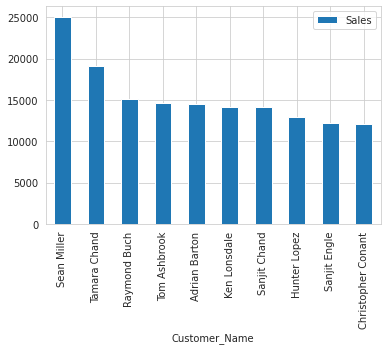

In [545]:
# YOUR CODE HERE
top_10 = df.pivot_table(index="Customer_Name", values="Sales", aggfunc='sum').sort_values("Sales", ascending=False).head(10)
top_10.plot(kind='bar')

>2.3. What are the most frequently bought product sub-categories ? 
>
> Hint: look at sub-category and count the times they appear in the dataset.

In [546]:
# YOUR CODE HERE
df["Sub-Category"].value_counts()


Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

>...What are the product sub-categories that generated the highest value of sales over the entire period?
>
> Hint: aggregate sales by sub-category.

In [547]:
# YOUR CODE HERE
df.groupby("Sub-Category", as_index=False)["Sales"].agg({"Sales": "sum"}).sort_values("Sales", ascending=False).reset_index()

,index,Sub-Category,Sales
0,13,Phones,326487.6980
1,5,Chairs,322107.5310
2,14,Storage,217779.1020
3,16,Tables,202810.6280
4,3,Binders,200028.7850
5,11,Machines,189238.6310
6,0,Accessories,163881.6900
7,6,Copiers,146248.0940
8,4,Bookcases,109408.2987
9,1,Appliances,104075.4630


>...What was the average purchase price of a phone sold by the store?

In [548]:
# YOUR CODE HERE
df['Sub-Category'].value_counts()

Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [27]:
326487.6980/875

373.12879771428567

>2.4 Create a new column storing the time difference between Ship Date and Order Date. What was the longest, shortest and the average delivery time difference?

In [549]:
# YOUR CODE HERE
df['TimeDiff'] = df['Ship_Date'] - df['Order_Date']
df['TimeDiff'].describe()

count                         9789
mean     3 days 23:04:06.031259577
std      1 days 18:00:39.083391657
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: TimeDiff, dtype: object

In [550]:
df.head(3)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,TimeDiff
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3 days
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3 days
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4 days


> 2.5. How many orders (not items) had a delivery time of 6 or more days? 
>
> Hint: you may want to use [`pd.Timedelta()`](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html).

In [551]:
# YOUR CODE HERE
df[df > 6].count(level='TimeDiff')

TypeError: ignored

>2.6. What are the average delivery times for each mode of shipment? Take the average over the total number of items ordered (not over the total number of orders).

In [ ]:
# YOUR CODE HERE


>2.7. Create a new column containing the year each order was placed (using Order Date). The plot the number of unique customers per year in a horizontal bar chart.

In [ ]:
# YOUR CODE HERE


>2.8. Churn in 2018 as compared to 2017. Were there any customers in 2017 that the store lost in 2018? If so, how many?

In [ ]:
# YOUR CODE HERE


>2.9. Generate a table with the average sales by customer segment and by year (take the simple average over the number of items sold). Plot in a line chart the average sales by customer segement over time, with the years on x-axis, the average sales on the y-axis, and a line for each segment.

In [ ]:
# YOUR CODE HERE


>2.10. Using `folium`, plot on a map the location of a subset of customers defined below, using circle markers proportionate to the value of their aggregate purchases.
>
> Only include 2018 data for corporate customers with per item purchases above USD 100. 
>
>A separate database with latitude and longitude measures for US zip codes is provided below. Merge the latitude and longitude with your transactions dataset. Make sure to drop any missing values before plotting your map.

In [ ]:
# import required packages
import folium

In [ ]:
# import latitude and longitude data
latlong=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data', 
                    dtype={'ZIP': 'str'})
latlong.head()

In [ ]:
# YOUR CODE HERE FOR SELECTING THE SUBSET


In [ ]:
# YOUR CODE HERE FOR MERGING THE SUBSET WITH THE LATITUDE AND LONGITUDE DATA


In [ ]:
# YOUR CODE HERE FOR GENERATING THE MAP


## 3. Regression Analysis

For this section please work on data aggregated by daily sales in USD. Here we are providing the dataframe for you. The regression dataset contains observations on sales aggregated by day, including:
* the date of the orders
* the number of orders received on that day
* the number of items ordered on that day
* the number of customer segments represented in the orders for that day
* the number of product sub-categories included
* the aggregated value of daily sales in USD
* the year, the month, and the day of the transactions stored separately.

>Load the data.

In [10]:
#Upload the data
new_data=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/regression_sales.csv')
new_data.head(5)

,Order Date,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
0,03/01/2015,1,1,1,1,16.448,2015,1,3,2.800204
1,04/01/2015,1,3,1,3,288.060,2015,1,4,5.663169
2,05/01/2015,1,1,1,1,19.536,2015,1,5,2.972259
3,06/01/2015,3,9,3,6,4407.100,2015,1,6,8.390972
4,07/01/2015,1,2,1,2,87.158,2015,1,7,4.467723


In [614]:
new_data.tail(5)

,Order Date,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
1224,26/12/2018,4,4,3,3,814.5940,2018,12,26,6.702690
1225,27/12/2018,1,2,1,2,177.6360,2018,12,27,5.179737
1226,28/12/2018,10,19,3,10,1657.3508,2018,12,28,7.412976
1227,29/12/2018,6,12,2,7,2915.5340,2018,12,29,7.977808
1228,30/12/2018,4,7,3,5,713.7900,2018,12,30,6.570589


>3.1.1. Generate descriptive statistics

In [615]:
# YOUR CODE HERE
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order Date          1229 non-null   object 
 1   number_orders       1229 non-null   int64  
 2   number_items        1229 non-null   int64  
 3   number_segments     1229 non-null   int64  
 4   number_subcategory  1229 non-null   int64  
 5   sales_per_day       1229 non-null   float64
 6   year                1229 non-null   int64  
 7   month               1229 non-null   int64  
 8   day                 1229 non-null   int64  
 9   log_sales           1229 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 96.1+ KB


In [616]:
new_data.describe()

,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,4.000000,7.965012,2.004068,5.266884,1832.878285,2016.536208,6.787632,15.794142,6.714374
std,2.799197,6.152745,0.770475,3.016305,2283.923773,1.124801,3.410032,8.781964,1.525230
min,1.000000,1.000000,1.000000,1.000000,2.025000,2015.000000,1.000000,1.000000,0.705570
25%,2.000000,3.000000,1.000000,3.000000,377.736000,2016.000000,4.000000,8.000000,5.934196
50%,3.000000,6.000000,2.000000,5.000000,1053.614000,2017.000000,7.000000,16.000000,6.959981
75%,5.000000,11.000000,3.000000,7.000000,2379.994000,2018.000000,10.000000,23.000000,7.774853
max,19.000000,38.000000,3.000000,14.000000,28106.716000,2018.000000,12.000000,31.000000,10.243764


>3.1.2. Plot the distribution of sales per day, using bins=50. Then create a new column equal to the natural logarithm of sales per day and plot its histogram as well.

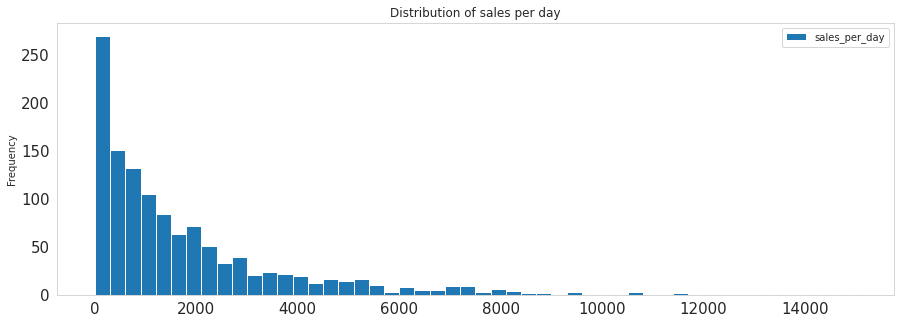

In [617]:
# YOUR CODE HERE
new_data['sales_per_day'].plot(kind='hist', bins=50, figsize=(15,5), title='Distribution of sales per day', legend=True, grid=False, fontsize=15, range=(0,15000))

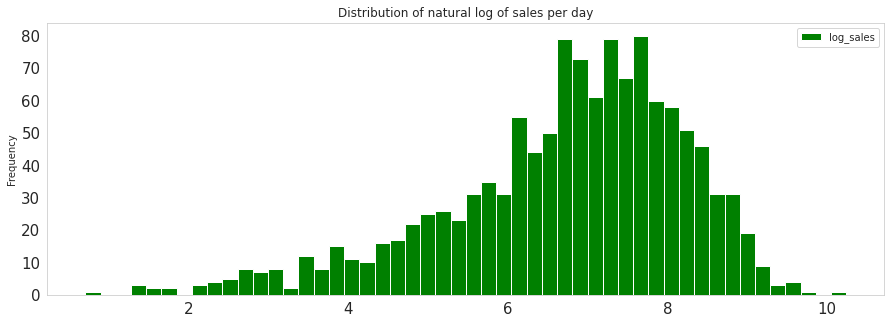

In [618]:
new_data['log_sales'].plot(kind='hist', bins=50, figsize=(15,5), title='Distribution of natural log of sales per day', legend=True, grid=False, fontsize=15, color='green')

>3.1.3. Create a pairplot with the log of sales per day on the horizontal axis and on the vertical axis the number of items ordered and number of orders.

In [ ]:
# YOUR CODE HERE


## Simple Linear Regression

>3.2 Regress log of sales on number of orders, number of items, number of segments, year, month and day.
>
>3.2.1. Select the dependent (y) and the independent variables (X).

In [11]:
# YOUR CODE HERE
import sklearn
from sklearn.model_selection import train_test_split
y = (new_data['log_sales'])
X = (new_data[['number_orders', 'number_items', 'number_segments', 'year', 'month', 'day']])
y.shape, X.shape

((1229,), (1229, 6))

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 77.**

In [12]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 77)

In [13]:
X_train.head()

,number_orders,number_items,number_segments,year,month,day
853,9,19,3,2017,11,5
590,1,2,1,2017,1,2
403,1,2,1,2016,5,20
822,2,2,1,2017,9,30
922,2,6,2,2018,1,22


>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data?

In [14]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("params: ", LR.coef_)
print("constant: ", LR.intercept_)
print("R^2 score: ", LR.score(X_train, y_train))

params:  [-8.50696759e-02  1.69065368e-01  4.93390631e-01  2.61469395e-03
 -5.27419820e-03 -1.70831086e-04]
constant:  -0.5142540595093843
R^2 score:  0.4954836572167168


>3.2.4. Predict what would be the total value of sales in USD on 15 January 2019 assuming there were 3 orders received on that day, including 9 items, from 3 segments.

In [16]:
# YOUR CODE HERE
print("number_orders: ", 3, "number_items: ", 9, "number_segments: ", 3, "year: ", 2019, "month: ", 1, "day: ", 15, "log_sales: ", LR.predict(np.array([3, 9, 3, 2019, 1, 15]).reshape(-1,6)))

number_orders:  3 number_items:  9 number_segments:  3 year:  2019 month:  1 day:  15 log_sales:  [7.50352754]


In [677]:
np.exp(7.50352754)

1814.4316188564414

## Linear Regression with Standardization

> 3.2.5. Apply a standard scaler to the following columns: number_orders, number_items, number_segments. 
> 
> Hint: use the scaler on the already split data. Fit-transform the scaler on X_train and apply transform on X_test.

In [17]:
# YOUR CODE HERE
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [18]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

> 3.2.6. Train a linear regression model with the standardised data. What is the R^2 score for the test data?

In [19]:
# YOUR CODE HERE
LR.fit(X_train, y_train)
print("R^2 score: ", LR.score(X_train, y_train))

R^2 score:  0.4954836572167168


> 3.2.7. Predict what would be the total number of sales in USD on 15 January 2019 assuming 3 orders received on that day, including 9 items, from 3 segments

In [28]:
# YOUR CODE HERE
print("number_orders: ", 3, "number_items: ", 9, "number_segments: ", 3, "year: ", 2019, "month: ", 1, "day: ", 15, "log_sales: ", LR.predict(np.array([3, 9, 3, 2019, 1, 15]).reshape(-1,6)))

number_orders:  3 number_items:  9 number_segments:  3 year:  2019 month:  1 day:  15 log_sales:  [22.13502017]


In [687]:
np.exp(22.13502017)

4103147380.7392087

>3.2.8. Looking at the coefficients from the linear regression with standardization, identify which variable is the most significant in this model. 

In [21]:
# YOUR CODE HERE
print("params: ", LR.coef_)

params:  [-0.23043804  1.01453418  0.382567    0.0029164  -0.01805996 -0.00148826]


The largest absolute values of  the standardized coefficients suggest that "number_items" is the most significant independent variable, and that the dates matter less.

> 3.2.9. Calculate the adjusted R-squared and identify the optimum regression coefficients using linear regression with standardisation. 
>
> Hint: calculate the adjusted R-squared for the full model with linear regression and standardisation (as above). The try dropping either one of the columns: 'number_orders', 'number_items', 'number_segments' and recalculate adjusted R-squared for every new model. Identify which combination of features gives the highest adjusted R-squared. 
>
>Check out this documentation file on the [adjusted R-squared](https://www.statology.org/adjusted-r-squared-in-python/).

In [23]:
# YOUR CODE HERE
LR.fit(X_train, y_train)
print("R^2 score: ", LR.score(X_train, y_train))

R^2 score:  0.4954836572167168


Train the model when you drop `number_segments` and calculate the adjusted R-squared.

In [26]:
# YOUR CODE HERE
X = X_train.drop('number_segments', 1,)

AttributeError: ignored

Train the model when you drop `number_items` and calculate the adjusted R-squared.

In [ ]:
# YOUR CODE HERE


Train the model when you drop `number_orders` and calculate the adjusted R-squared.

In [ ]:
# YOUR CODE HERE
